<a href="https://colab.research.google.com/github/solayman-cs/ICH/blob/main/DWT_ICH_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/NoteBooks/DWT-ICH

/content/drive/My Drive/NoteBooks/DWT-ICH


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import the dwt_ich library
from  dwt_ich import ICH

In [ ]:
img_id = '49_2'

In [ ]:
#create object of ICH class
brain = ICH()

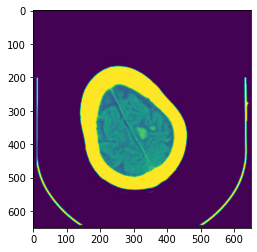

In [ ]:
img = plt.imread('/content/drive/My Drive/DataSets/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/brain_image_dir'+img_id+'.jpg')
plt.imshow(img)

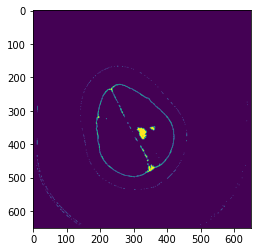

In [ ]:
plt.imshow(pred_mask)

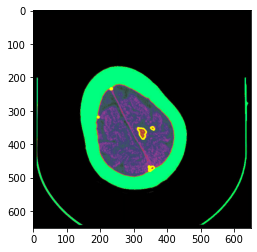

In [ ]:
# in return you get back image after segmentation
plt.imshow(res,cmap='gray')

In [ ]:
def Jaccard_img(y_true, y_pred): #https://www.jeremyjordan.me/evaluating-image-segmentation-models/
    iou_score=0
    counter=0
    for i in range(y_true.shape[0]):
        if np.sum(y_true[i])>0:#Considering only the slices that have hemorrhage regions, if y_true is all zeros -> iou_score=nan.
            im1 = np.asarray(y_true[i]).astype(np.bool)
            im2 = np.asarray(y_pred[i]).astype(np.bool)
            intersection = np.logical_and(im1, im2)
            union = np.logical_or(im1, im2)
            iou_score+= np.sum(intersection) / np.sum(union)
            counter+=1
    if counter>0:
        return iou_score/counter
    else:
        return np.nan

In [ ]:
jac_indx = Jaccard_img(mask, pred_mask)
print(jac_indx)
print('*_--------------------------------------------')

0.32644878639068825
*_--------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
